# Part 1: Making Sounds with Python

In [1]:
# Import the required Packages
import numpy as np
from scipy import signal
import sounddevice as sd
import IPython.display as ipd
import matplotlib.pyplot as plt

## Creating our first sound

Sound is just continuous and regular waves traveling through a medium (typically air). These waves can be represented as oscillations that vary in amplitude (loudness) and frequency (pitch). One of the beautiful things about digital audio is that we can create these waves programmatically.


Let's start by looking at how we can model a simple sine wave, which is the purest form of sound:


In [2]:
# We define the sample rate (how many points per second), duration, and frequency
sample_rate = 44100  # CD-quality audio (samples per second)
duration = 2  # seconds
frequency = 440  # Hz (A4 note)
amplitude = 0.4 # loudness

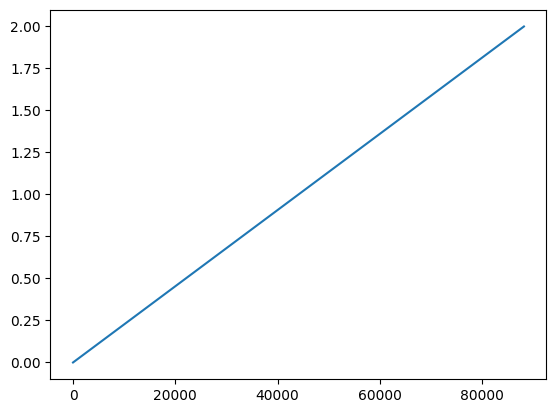

In [3]:
# Range of the sound: nsamples points equaly spaced in the range
sample_space = np.linspace(
    0, # start
    duration, # stop
    int(sample_rate * duration), # Number of samples to generate
    endpoint=False # if True stop is the last sample, here its not included
)
plt.plot(sample_space)

In [4]:
# Numpy Sin of One angle
np.sin(
    np.pi/ 2 # Angle, in radians
)

1.0

**Convert Frequency in Hz to Angular Frequency**

Angular frequency (in radians) is larger than regular frequency (in Hz) by a factor of 2π
```math
ω = 2πf
```

In [5]:
# Calculate angular frequency
angular_frequency = 2 * np.pi * frequency  # radians/second

# Calculate the phase for each point in sample space
phase = angular_frequency * sample_space

In [6]:
sine_wave = np.sin(phase) * amplitude
ipd.Audio(sine_wave, rate=sample_rate, normalize=False)

In [30]:
# To create any wave we need phase over time
def phase_from_frequency(frequency, sample_space=sample_space):
    return 2*np.pi*frequency*sample_space

#### Sine wave

Also called **fundamental**, Sine waves are the simplest periodic waveforms, meaning they oscillate smoothly and continuously with a single frequency. Any complex waveform can be constructed by combining different sine waves with varying amplitudes and frequencies


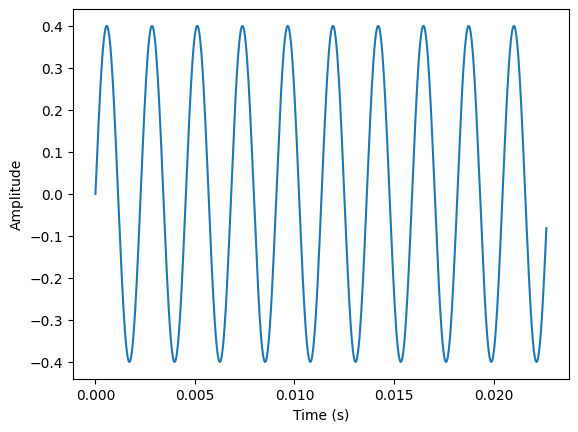

In [8]:
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(sample_space[:1000], sine_wave[:1000])

#### Square wave

Square waves are a step away from smoothness and more toward buzziness. They contain Harmonics (frequencies that are whole number multiples of the fundamental frequency). Square waveforms drone at low frequencies, and by the nature of their upper and lower envelopes are the loudest waveform

#### Triangle wave

This wave is in between a square wave and sine wave: It does not have the ups and downs of a square wave (not as buzzy) but not as smooth as a sine wave (taper off as they get further away from the fundamental)

#### Sawtooth wave

This variation of the triangle wave is much more jagged and so looks like a saw! It is the buzziest sounding of them all, sounding even harsher than a square wave, and that’s because it’s the richest in terms of harmonics so you can make some really cool sounds by filtering out frequencies

Square Wave


Triangle Wave


SawTooth Wave


Text(0.5, 1.0, 'Sawtooth Wave')

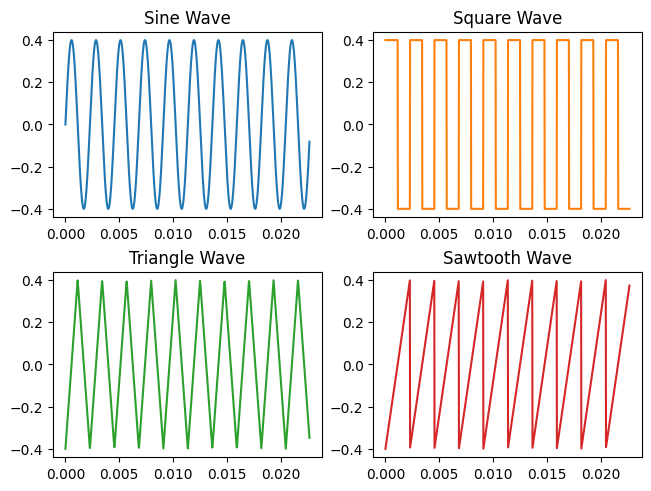

In [9]:
print("Square Wave")
square_wave_data = signal.square(phase_from_frequency(frequency))*amplitude
ipd.display(ipd.Audio(square_wave_data, rate=sample_rate, normalize=False))

print("Triangle Wave")
tri_wave_data = signal.sawtooth(phase_from_frequency(frequency),  width=0.5)*amplitude
ipd.display(ipd.Audio(tri_wave_data, rate=sample_rate, normalize=False))

print("SawTooth Wave")
saw_wave_data = signal.sawtooth(phase_from_frequency(frequency))*amplitude
ipd.display(ipd.Audio(saw_wave_data, rate=sample_rate, normalize=False))

fig, axs = plt.subplots(2, 2, constrained_layout=True)
axs[0, 0].plot(sample_space[:1000], sine_wave[:1000])
axs[0, 0].set_title('Sine Wave')
axs[0, 1].plot(sample_space[:1000], square_wave_data[:1000], 'tab:orange')
axs[0, 1].set_title('Square Wave')
axs[1, 0].plot(sample_space[:1000], tri_wave_data[:1000], 'tab:green')
axs[1, 0].set_title('Triangle Wave')
axs[1, 1].plot(sample_space[:1000], saw_wave_data[:1000], 'tab:red')
axs[1, 1].set_title('Sawtooth Wave')

### [E] Make a simple Sequence

Stack Sounds
To play notes one after the other, frequencies need to be stacked Horizontally to create a Sequence

Use Numpy to stack arrays in sequence horizontally

In [14]:
# Multiple tones at different frequencies
tone1 = signal.sawtooth(phase_from_frequency(50)) * 0.2
tone2 = signal.sawtooth(phase_from_frequency(60)) * 0.2
tone3 = signal.sawtooth(phase_from_frequency(40)) * 0.2
tone4 = signal.sawtooth(phase_from_frequency(30)) * 0.2

## Playing around with frequencies

### Kick with Square Wave

In [31]:
frequency = 1
duration = 3

square_wave_data = signal.square(phase_from_frequency(frequency, sample_space))*amplitude
ipd.Audio(square_wave_data, rate=sample_rate, normalize=False)
# Adding a Cutoff + Filters would make it a crisp Kick

In [27]:
sd.play(square_wave_data)

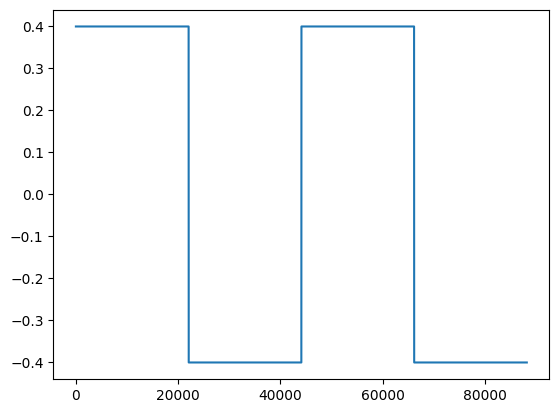

In [13]:
plt.plot(square_wave_data)

# Oscillators

An oscillator is anything that oscillates, usually in some repetetive fashion. In synthesizers, oscillators are the fundamental sound-generating components that produce repeating waveforms ( ine, square, sawtooth, triangle) at a specific frequency, forming the basis for all the sounds you can create. 


### [E] Make a simple Oscillator

In [37]:
def phase_from_frequency(frequency, duration, sample_rate=44100):
    time = np.linspace(
        0, # start
        duration, # stop
        int(sample_rate * duration),
        endpoint=False
    )
    angular_freq = 2*np.pi*frequency
    return angular_freq * time

def get_sine_wave(frequency, amp, duration):
    return np.sin(phase_from_frequency(frequency, duration)) * amp

def get_triangle_wave(frequency, amp, duration):
    return signal.sawtooth(phase_from_frequency(frequency, duration),  width=0.5)*amp

def get_square_wave(frequency, amp, duration):
    return signal.square(phase_from_frequency(frequency, duration)) * amp

def get_sawtooth_wave(frequency, amp, duration):
    return signal.sawtooth(phase_from_frequency(frequency, duration)) * amp

In [42]:
class Oscillator:
    def __init__(self, shape):
        """
        Initialise an Oscillator
        """
        pass

    def play(self, frequency, amp=1, duration=1):
        """
        Play the sound
        """
        pass

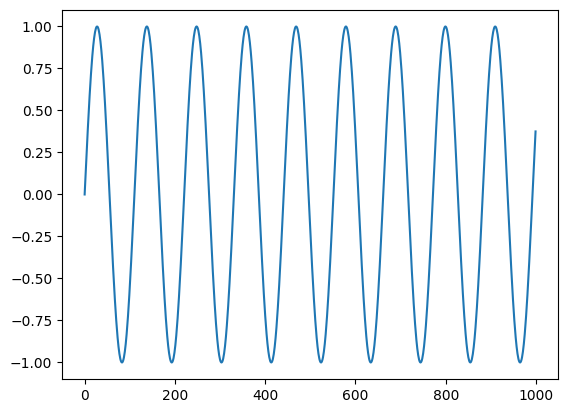

In [44]:
osc = Oscillator("sine")
sine_wave = osc.play(400, 1, 0.5)
plt.plot(sine_wave[:1000])

## Multiple Oscillators

Many synthesizers have multiple oscillators, allowing for more complex and layered sounds.


In [57]:
sine_wave = get_sine_wave(440, 0.5, duration)
saw_wave = get_sawtooth_wave(300, 0.1, duration)

**Addition**

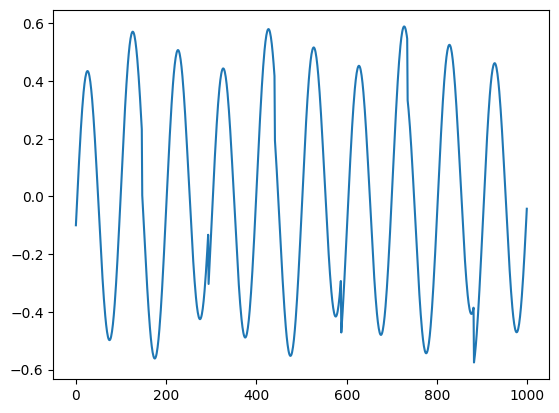

In [58]:
# Combine the waveforms
combined = sine_wave + saw_wave
plt.plot(combined[:1000])

In [59]:
ipd.Audio(combined, rate=sample_rate)

Linear combination that results in a waveform that preserves the fundamental frequencies of both waves which means you hear both waves playing simultaneously, but as a single coherent sound rather than two separate sounds


## [E] Try other operations

**Non Linear Operations**

By running Non-Linear operations that are not add/subtract you can create new frequencies that weren't present in either original wave. This takes us to our next topic **Modulation**

PS: Multiplication of waveforms creates what's known as "ring modulation" or "amplitude modulation" depending on the frequencies involved

Here are some more complex modulations

In [62]:
combined_modulo = sine_wave % saw_wave
sd.play(combined_modulo)
# bit-crushing sounds due to Aliasing/ Harmonic folding

In [67]:
combined_power = sine_wave ** saw_wave
sd.play(combined_power)
# # Extreme non-linear distortion

Things to try out: Min/Max, Trigonometric functions, Polynomials etc..